In [5]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import acquire
import prepare

In [6]:
telco = prepare.prep_telco_alternative()

# Decision Tree

In [7]:
telco_string = telco
# telco = prepare.prep_telco()
# telco = telco.drop(columns=telco.select_dtypes(exclude='number').columns)
# telco = telco.astype('str')

In [8]:
telco_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            7043 non-null   int64  
 1   senior_citizen                        7043 non-null   int64  
 2   tenure                                7043 non-null   int64  
 3   monthly_charges                       7043 non-null   float64
 4   gender_Male                           7043 non-null   uint8  
 5   partner_Yes                           7043 non-null   uint8  
 6   dependents_Yes                        7043 non-null   uint8  
 7   phone_service_Yes                     7043 non-null   uint8  
 8   multiple_lines_No phone service       7043 non-null   uint8  
 9   multiple_lines_Yes                    7043 non-null   uint8  
 10  online_security_Yes                   7043 non-null   uint8  
 11  online_backup_Yes

In [9]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_data_label(telco_string, 'churn_Yes')

In [10]:
X_train.shape, X_validate.shape, X_test.shape

((4225, 25), (1409, 25), (1409, 25))

In [11]:
y_train.shape, y_validate.shape, y_test.shape

((4225,), (1409,), (1409,))

In [12]:
clf.classes_.astype('str')

NameError: name 'clf' is not defined

[0 0 0 0 0]


array([[0.60572337, 0.39427663],
       [0.60572337, 0.39427663],
       [0.60572337, 0.39427663],
       [0.73333333, 0.26666667],
       [0.9877451 , 0.0122549 ]])

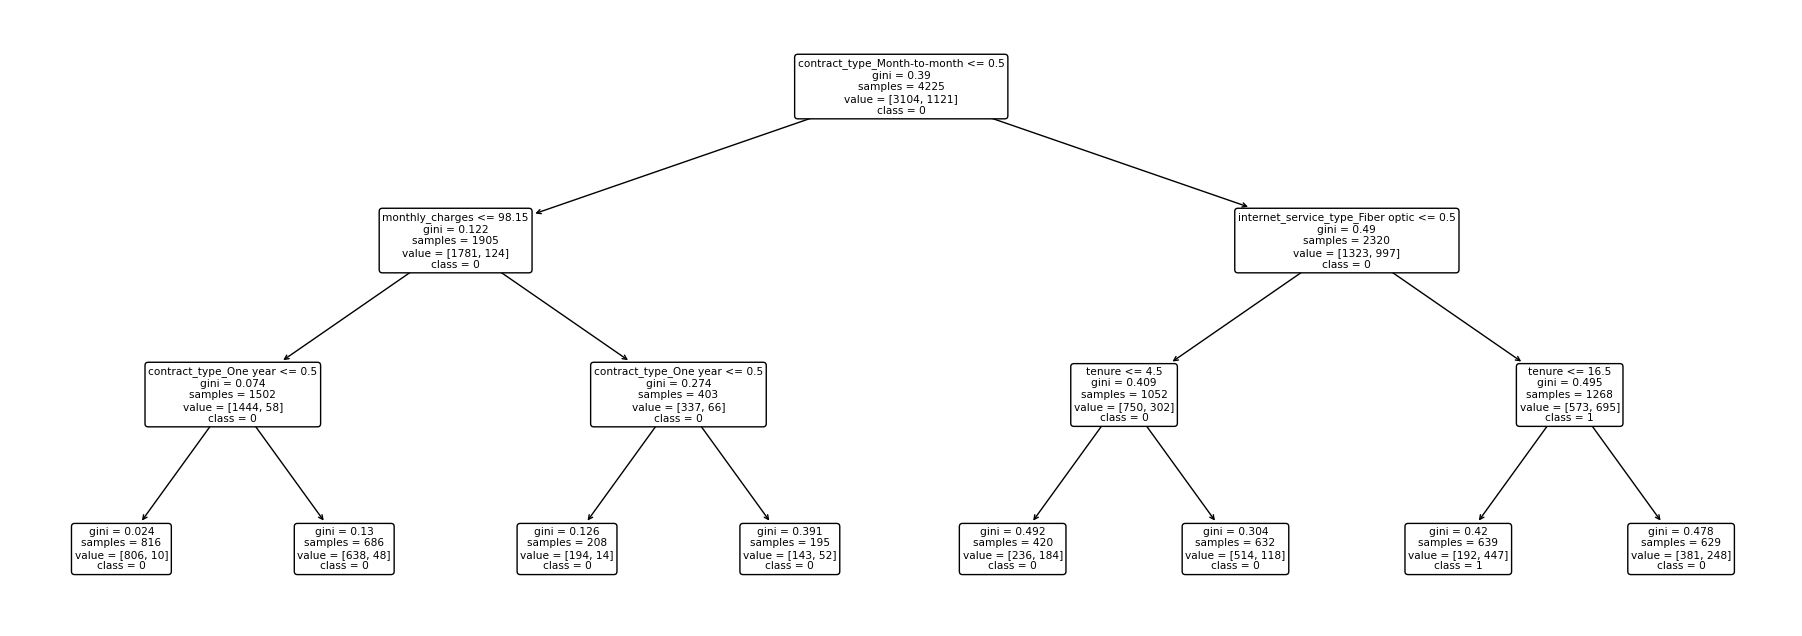

In [13]:
clf = DecisionTreeClassifier(max_depth=3, random_state=823)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(23, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype('str'), rounded=True)
y_pred = clf.predict(X_train)
print(y_pred[0:5])
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [14]:
print('Accuracy of Decision Tree classifier on training set: {:.8f}'
      .format(clf.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(y_train.value_counts())
labels = sorted(y_train.unique())
results = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)
results

Accuracy of Decision Tree classifier on training set: 0.79502959
[[2912  192]
 [ 674  447]]
0    3104
1    1121
Name: churn_Yes, dtype: int64


,0,1
0,2912,192
1,674,447


In [15]:
results[0][1]#/(results['0']['1']+results['1']['1'])  WHY THE HELL IS COLUMN AND ROW MIXED UP!

674

In [16]:
confusion_matrix(y_train, y_pred)[1][1]/(confusion_matrix(y_train, y_pred)[1][0] + confusion_matrix(y_train, y_pred)[1][1])

0.39875111507582517

In [17]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3104
           1       0.70      0.40      0.51      1121

    accuracy                           0.80      4225
   macro avg       0.76      0.67      0.69      4225
weighted avg       0.78      0.80      0.77      4225



In [18]:
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth=i, random_state=823)
    clf = clf = clf.fit(X_train, y_train)
    #print(f'Accuracy of Decision Tree classifier on training set with depth {i}: {clf.score(X_train, y_train)})')
    #print(f'     Accuracy of Decision Tree classifier on validate set with depth {i}: {clf.score(X_validate, y_validate)})')
    print(f'Sensitivity of Decision Tree classifier on training set with depth {i}: {confusion_matrix(y_train, y_pred)[1][1]/(confusion_matrix(y_train, y_pred)[1][0] + confusion_matrix(y_train, y_pred)[1][1])}')

Sensitivity of Decision Tree classifier on training set with depth 1: 0.39875111507582517
Sensitivity of Decision Tree classifier on training set with depth 2: 0.39875111507582517
Sensitivity of Decision Tree classifier on training set with depth 3: 0.39875111507582517
Sensitivity of Decision Tree classifier on training set with depth 4: 0.39875111507582517
Sensitivity of Decision Tree classifier on training set with depth 5: 0.39875111507582517
Sensitivity of Decision Tree classifier on training set with depth 6: 0.39875111507582517
Sensitivity of Decision Tree classifier on training set with depth 7: 0.39875111507582517
Sensitivity of Decision Tree classifier on training set with depth 8: 0.39875111507582517
Sensitivity of Decision Tree classifier on training set with depth 9: 0.39875111507582517


In [19]:
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth=i, random_state=823)
    clf = clf = clf.fit(X_train, y_train)
    print(f'Accuracy Spread of Decision Tree classifier between train and validate with depth {i}: {clf.score(X_train, y_train) - clf.score(X_validate, y_validate)})')

Accuracy Spread of Decision Tree classifier between train and validate with depth 1: 0.00011103598590633812)
Accuracy Spread of Decision Tree classifier between train and validate with depth 2: 0.015502034679847676)
Accuracy Spread of Decision Tree classifier between train and validate with depth 3: 0.010075717807333184)
Accuracy Spread of Decision Tree classifier between train and validate with depth 4: 0.011970552786188637)
Accuracy Spread of Decision Tree classifier between train and validate with depth 5: 0.022383746078674327)
Accuracy Spread of Decision Tree classifier between train and validate with depth 6: 0.04581032332301638)
Accuracy Spread of Decision Tree classifier between train and validate with depth 7: 0.0543340570550267)
Accuracy Spread of Decision Tree classifier between train and validate with depth 8: 0.07326594462479152)
Accuracy Spread of Decision Tree classifier between train and validate with depth 9: 0.10828948307793096)


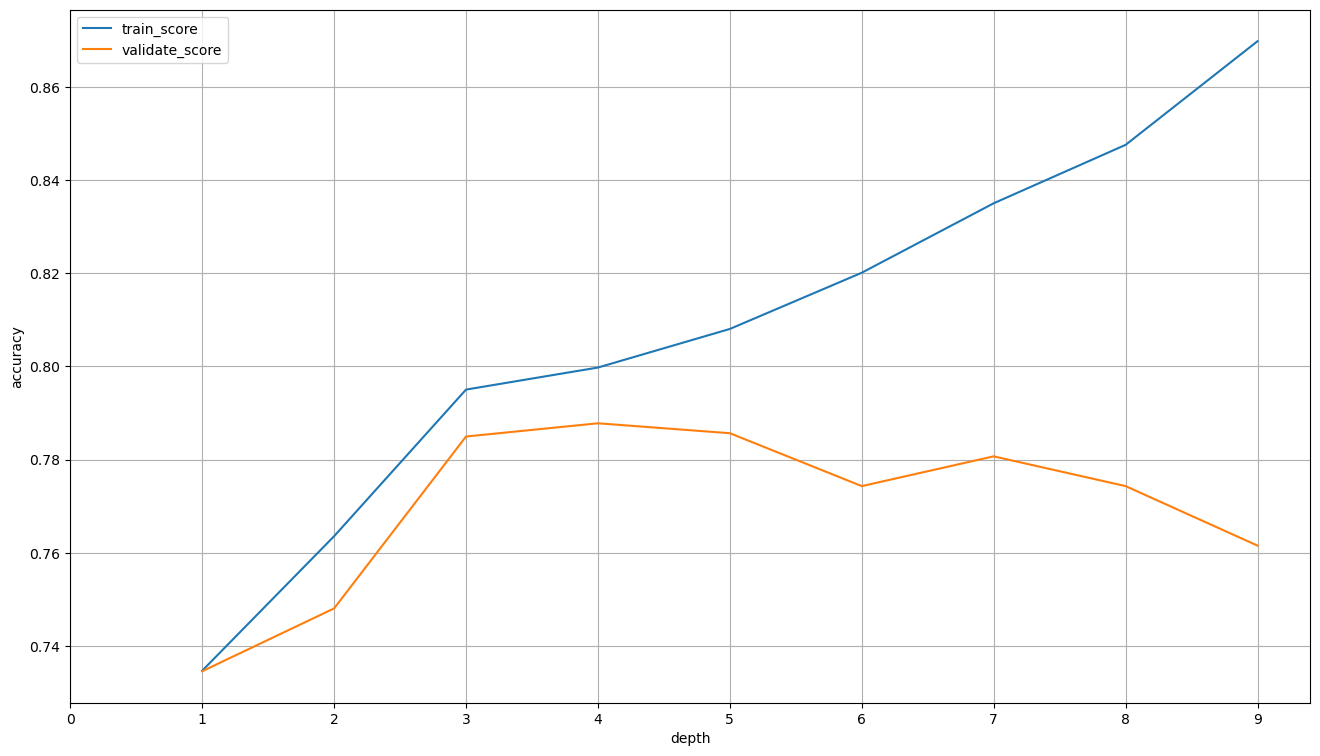

In [20]:
#FROM CLASS

metrics = []

for d in range(1,10):
    #Loops through the Decision Tree Classifier at each depth one through ten
    clf = DecisionTreeClassifier(max_depth=d, random_state=823)
    # Fits the data
    clf = clf = clf.fit(X_train, y_train)
    #Finds the train and validate accuracy scores
    train_score= clf.score(X_train, y_train)
    validate_score = clf.score(X_validate, y_validate)
    
    output = {
        "depth": d,
        "train_score": train_score,
        "validate_score": validate_score}
    
    metrics.append(output)
    
results = pd.DataFrame(metrics)

#Plots the results
results.set_index('depth').plot(figsize=(16,9))
plt.ylabel('accuracy')
plt.xticks(np.arange(0,10,1))
plt.grid()
plt.show()

# Random Forrest

In [21]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_data_label(telco, 'churn_Yes')

In [22]:
rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None,
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=18,
                            max_depth=8,
                            random_state=823)
rf.fit(X_train, y_train)
print(rf.feature_importances_)
y_pred = rf.predict(X_train)
print(y_pred[0:10])
y_pred_proba = rf.predict_proba(X_train)
print(y_pred_proba)
y_val = rf.predict(X_validate)
y_val_proba = rf.predict_proba(X_validate)

[0.0602452  0.01248687 0.22046657 0.11284741 0.00923298 0.00772476
 0.01114404 0.00600676 0.00255514 0.01001959 0.02648775 0.015342
 0.01552823 0.01956412 0.01011769 0.01204346 0.01707199 0.05680761
 0.03119152 0.01667283 0.0765578  0.00580333 0.13423115 0.02511332
 0.08473789]
[0 0 0 0 0 0 0 0 0 0]
[[0.53838633 0.46161367]
 [0.7372398  0.2627602 ]
 [0.57332904 0.42667096]
 ...
 [0.9897294  0.0102706 ]
 [0.8177411  0.1822589 ]
 [0.78633527 0.21366473]]


In [23]:
print(f'Sensitivity of Random Forrest on training set with 10 trees: {confusion_matrix(y_train, y_pred)[1][1]/(confusion_matrix(y_train, y_pred)[1][0] + confusion_matrix(y_train, y_pred)[1][1])}')

Sensitivity of Random Forrest on training set with 10 trees: 0.5753791257805531


In [24]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3104
           1       0.76      0.58      0.65      1121

    accuracy                           0.84      4225
   macro avg       0.81      0.75      0.77      4225
weighted avg       0.83      0.84      0.83      4225



In [25]:
print(confusion_matrix(y_validate, y_val))

[[929 106]
 [186 188]]


In [26]:
print(f'Sensitivity of Random Forrest on training set with 10 trees: {confusion_matrix(y_validate, y_val)[1][1]/(confusion_matrix(y_validate, y_val)[1][0] + confusion_matrix(y_validate, y_val)[1][1])}')

Sensitivity of Random Forrest on training set with 10 trees: 0.5026737967914439


In [27]:
print(classification_report(y_validate, y_val))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# KNN

In [28]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_data_label(telco, 'churn_Yes')

In [29]:
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=1)
knn5.fit(X_train, y_train)
y_pred5 = knn5.predict(X_train)
print(y_pred5[0:5])
y_pred_proba = knn5.predict_proba(X_train)
print(y_pred_proba[0:5])
knn5.classes_

[0 0 0 0 0]
[[0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]]


array([0, 1], dtype=uint8)

In [30]:
pd.crosstab(y_train, y_pred5)

col_0,0,1
churn_Yes,,
0,2871,233
1,496,625


In [31]:
confusion_matrix(y_train, y_pred5)[1][1]/(confusion_matrix(y_train, y_pred5)[1][1]+confusion_matrix(y_train, y_pred5)[1][0])

0.5575379125780553

In [32]:
telco.describe()

,Unnamed: 0,senior_citizen,tenure,monthly_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.162147,32.371149,64.761692,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.592219,0.265370,0.439585,0.216669,0.216101,0.335794,0.228880,0.550192,0.209144,0.240664
std,2033.283305,0.368612,24.559481,30.090047,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.491457,0.441561,0.496372,0.412004,0.411613,0.472301,0.420141,0.497510,0.406726,0.427517
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3521.000000,0.000000,29.000000,70.350000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5281.500000,0.000000,55.000000,89.850000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,7042.000000,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
y_pred = knn5.predict(X_train)
print(y_pred[0:5])
y_pred_proba = knn5.predict_proba(X_train)
y_pred_proba[0:5]
print(confusion_matrix(y_train, y_pred))
y_val = knn5.predict(X_validate)
y_val_proba = knn5.predict_proba(X_validate)

[0 0 0 0 0]
[[2871  233]
 [ 496  625]]


In [34]:
print(f'Sensitivity of Decision Tree classifier on training set with depth {i}: {confusion_matrix(y_train, y_pred)[1][1]/(confusion_matrix(y_train, y_pred)[1][0] + confusion_matrix(y_train, y_pred)[1][1])}')

Sensitivity of Decision Tree classifier on training set with depth 9: 0.5575379125780553


In [35]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      3104
           1       0.73      0.56      0.63      1121

    accuracy                           0.83      4225
   macro avg       0.79      0.74      0.76      4225
weighted avg       0.82      0.83      0.82      4225



In [36]:
print(confusion_matrix(y_validate, y_val))

[[886 149]
 [205 169]]


In [37]:
print(f'Sensitivity of KNN on training set with i neighbors: {confusion_matrix(y_validate, y_val)[1][1]/(confusion_matrix(y_validate, y_val)[1][0] + confusion_matrix(y_validate, y_val)[1][1])}')

Sensitivity of KNN on training set with i neighbors: 0.45187165775401067


In [38]:
model_set = []
model_accuracies = {}

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', p=1)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)
    
    y_val = knn.predict(X_validate)
    y_val_proba = knn.predict_proba(X_validate)
    
    st = round(confusion_matrix(y_train, y_pred)[1][1]/(confusion_matrix(y_train, y_pred)[1][0] + confusion_matrix(y_train, y_pred))[1][1], 5)
    sv = round(confusion_matrix(y_validate, y_val)[1][1]/(confusion_matrix(y_validate, y_val)[1][0] + confusion_matrix(y_validate, y_val))[1][1], 5)
    model_set.append(knn)
    model_accuracies[f'{i} neighbors'] = {
        'train_score' : round(knn.score(X_train, y_train), 5),
        'validate_score' : round(knn.score(X_validate, y_validate), 5),
        'Sensitivity_train' : st,
        'Sensitivity_validate' : sv,
        'Sensitivity_difference' : (st-sv),
        'Just_for_analysis_TP' : (confusion_matrix(y_train, y_pred)[0][0]/3104), 
        'Just_for_analysis_TP_val' : (confusion_matrix(y_validate, y_val)[0][0]/1121)
    }

In [39]:
model_set

[KNeighborsClassifier(n_neighbors=1, p=1),
 KNeighborsClassifier(n_neighbors=2, p=1),
 KNeighborsClassifier(n_neighbors=3, p=1),
 KNeighborsClassifier(n_neighbors=4, p=1),
 KNeighborsClassifier(p=1),
 KNeighborsClassifier(n_neighbors=6, p=1),
 KNeighborsClassifier(n_neighbors=7, p=1),
 KNeighborsClassifier(n_neighbors=8, p=1),
 KNeighborsClassifier(n_neighbors=9, p=1),
 KNeighborsClassifier(n_neighbors=10, p=1),
 KNeighborsClassifier(n_neighbors=11, p=1),
 KNeighborsClassifier(n_neighbors=12, p=1),
 KNeighborsClassifier(n_neighbors=13, p=1),
 KNeighborsClassifier(n_neighbors=14, p=1),
 KNeighborsClassifier(n_neighbors=15, p=1),
 KNeighborsClassifier(n_neighbors=16, p=1),
 KNeighborsClassifier(n_neighbors=17, p=1),
 KNeighborsClassifier(n_neighbors=18, p=1),
 KNeighborsClassifier(n_neighbors=19, p=1)]

In [40]:
model_accuracies

{'1 neighbors': {'train_score': 1.0,
  'validate_score': 0.70121,
  'Sensitivity_train': 1.0,
  'Sensitivity_validate': 0.48128,
  'Sensitivity_difference': 0.5187200000000001,
  'Just_for_analysis_TP': 1.0,
  'Just_for_analysis_TP_val': 0.72078501338091},
 '2 neighbors': {'train_score': 0.86462,
  'validate_score': 0.75373,
  'Sensitivity_train': 0.48974,
  'Sensitivity_validate': 0.28342,
  'Sensitivity_difference': 0.20632,
  'Just_for_analysis_TP': 1.0,
  'Just_for_analysis_TP_val': 0.8528099910793934},
 '3 neighbors': {'train_score': 0.86201,
  'validate_score': 0.73953,
  'Sensitivity_train': 0.67261,
  'Sensitivity_validate': 0.45989,
  'Sensitivity_difference': 0.21272000000000002,
  'Just_for_analysis_TP': 0.9304123711340206,
  'Just_for_analysis_TP_val': 0.776092774308653},
 '4 neighbors': {'train_score': 0.82627,
  'validate_score': 0.74663,
  'Sensitivity_train': 0.4264,
  'Sensitivity_validate': 0.28075,
  'Sensitivity_difference': 0.14565,
  'Just_for_analysis_TP': 0.9706

In [41]:
pd.DataFrame(model_accuracies).T

,train_score,validate_score,Sensitivity_train,Sensitivity_validate,Sensitivity_difference,Just_for_analysis_TP,Just_for_analysis_TP_val
1 neighbors,1.00000,0.70121,1.00000,0.48128,0.51872,1.000000,0.720785
2 neighbors,0.86462,0.75373,0.48974,0.28342,0.20632,1.000000,0.852810
3 neighbors,0.86201,0.73953,0.67261,0.45989,0.21272,0.930412,0.776093
4 neighbors,0.82627,0.74663,0.42640,0.28075,0.14565,0.970683,0.844781
5 neighbors,0.82746,0.74876,0.55754,0.45187,0.10567,0.924936,0.790366
6 neighbors,0.81254,0.75869,0.40946,0.31283,0.09663,0.958119,0.849242
7 neighbors,0.81183,0.74734,0.50937,0.40374,0.10563,0.921070,0.804639
8 neighbors,0.80071,0.76011,0.37467,0.31551,0.05916,0.954575,0.850134
9 neighbors,0.80521,0.74450,0.46655,0.37968,0.08687,0.927513,0.809099
10 neighbors,0.79953,0.75444,0.37288,0.29412,0.07876,0.953608,0.850134


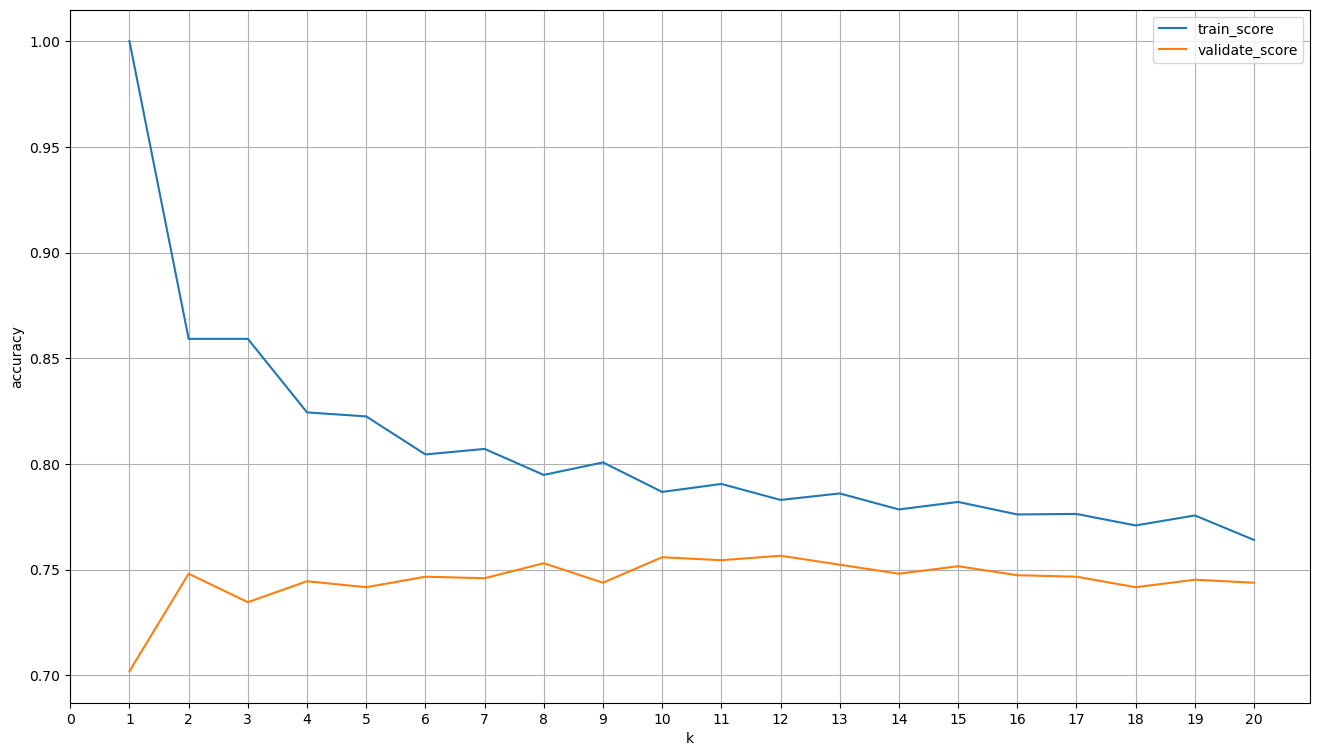

In [42]:
#FROM CLASS
metrics = []

# Loops through the different values one through twenty
for k in range(1,21):
    #Classifies the nearest neighbors and runs all the KNN for one neighbor through 20 neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fits the data
    knn.fit(X_train, y_train)
    # Gets the accuracies each of the train and validate sets for all the loops
    train_score= knn.score(X_train, y_train)
    validate_score = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score}
    
    metrics.append(output)
    
results = pd.DataFrame(metrics)

#plots the results
results.set_index('k').plot(figsize=(16,9))
plt.ylabel('accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()

In [43]:
#telco_knn = prepare.prep_telco_alternative()
telco_knn = telco
telco_knn

,Unnamed: 0,senior_citizen,tenure,monthly_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0,0,9,65.60,0,1,1,1,0,0,...,1,0,0,0,0,0,1,0,1,0
1,1,0,9,59.90,1,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
2,2,0,4,73.90,1,0,0,1,0,0,...,1,1,1,0,0,1,0,1,0,0
3,3,1,13,98.00,1,1,0,1,0,0,...,1,1,1,0,0,1,0,1,0,0
4,4,1,3,83.90,0,1,0,1,0,0,...,1,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,13,55.15,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
7039,7039,0,22,85.10,1,1,0,1,0,1,...,1,1,1,0,0,1,0,1,0,0
7040,7040,0,2,50.30,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
7041,7041,0,67,67.85,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [44]:
telco_knn.columns

Index(['Unnamed: 0', 'senior_citizen', 'tenure', 'monthly_charges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'churn_Yes',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'contract_type_Month-to-month',
       'contract_type_One year', 'contract_type_Two year'],
      dtype='object')

In [45]:
#See if I can maximize distance by making all significant churn results in the 1 column
telco_knn['senior_citizen'] = telco_knn['senior_citizen'].replace([0,1], [1,0])
telco_knn['partner_Yes'] = telco_knn['partner_Yes'].replace([0,1], [1,0])
telco_knn['dependents_Yes'] = telco_knn['dependents_Yes'].replace([0,1], [1,0])
telco_knn['multiple_lines_Yes'] = telco_knn['multiple_lines_Yes'].replace([0,1], [1,0])
telco_knn['online_security_Yes'] = telco_knn['online_security_Yes'].replace([0,1], [1,0])
telco_knn['online_backup_Yes'] = telco_knn['online_backup_Yes'].replace([0,1], [1,0])
telco_knn['device_protection_Yes'] = telco_knn['device_protection_Yes'].replace([0,1], [1,0])
telco_knn['tech_support_Yes'] = telco_knn['tech_support_Yes'].replace([0,1], [1,0])
telco_knn['internet_service_type_Fiber optic'] = telco_knn['internet_service_type_Fiber optic'].replace([0,1], [1,0])
telco_knn['internet_service_type_None'] = telco_knn['internet_service_type_None'].replace([0,1], [1,0])
telco_knn['payment_type_Mailed check'] = telco_knn['payment_type_Mailed check'].replace([0,1], [1,0])
telco_knn['contract_type_One year'] = telco_knn['contract_type_One year'].replace([0,1], [1,0])
telco_knn['contract_type_Two year'] = telco_knn['contract_type_Two year'].replace([0,1], [1,0])
telco_knn['tenure_normalized'] = telco_knn['tenure_normalized'].replace([0,1], [1,0])

KeyError: 'tenure_normalized'

In [ ]:
telco_knn = telco_knn.drop(columns=['senior_citizen', 'partner_Yes', 'dependents_Yes', 'multiple_lines_Yes', 'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes', 'payment_type_Credit card (automatic)', 'payment_type_Mailed check'])

In [ ]:
telco_knn = telco_knn.drop(columns=['streaming_tv_Yes', 'streaming_movies_Yes', 'monthly_charges_normalized'])

In [ ]:
telco_knn = telco_knn.drop(columns=['Unnamed: 0'])

In [ ]:
telco_knn

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_data_label(telco_knn, 'churn_Yes')

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
knn5.fit(X_train, y_train)
y_pred5 = knn5.predict(X_train)
print(y_pred5[0:5])
y_pred_proba = knn5.predict_proba(X_train)
print(y_pred_proba[0:5])
knn5.classes_

In [46]:
#FROM CLASS
model_set = []
model_accuracies = {}

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', p=1)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)

    y_val = knn.predict(X_validate)
    y_val_proba = knn.predict_proba(X_validate)
    
    st = round(confusion_matrix(y_train, y_pred)[1][1]/(confusion_matrix(y_train, y_pred)[1][0] + confusion_matrix(y_train, y_pred))[1][1], 5)
    sv = round(confusion_matrix(y_validate, y_val)[1][1]/(confusion_matrix(y_validate, y_val)[1][0] + confusion_matrix(y_validate, y_val))[1][1], 5)
   

    model_set.append(knn)
    model_accuracies[f'{i} neighbors'] = {
        'train_score' : round(knn.score(X_train, y_train), 5),
        'validate_score' : round(knn.score(X_validate, y_validate), 5),
        'Sensitivity_train' : st,
        'Sensitivity_validate' : sv,
        'Sensitivity_difference' : (st-sv),
        'Just_for_analysis_TP' : (confusion_matrix(y_train, y_pred)[0][0]/3104), 
        'Just_for_analysis_TP_val' : (confusion_matrix(y_validate, y_val)[0][0]/1121)
        
        
    }

In [47]:
model_set

[KNeighborsClassifier(n_neighbors=1, p=1),
 KNeighborsClassifier(n_neighbors=2, p=1),
 KNeighborsClassifier(n_neighbors=3, p=1),
 KNeighborsClassifier(n_neighbors=4, p=1),
 KNeighborsClassifier(p=1),
 KNeighborsClassifier(n_neighbors=6, p=1),
 KNeighborsClassifier(n_neighbors=7, p=1),
 KNeighborsClassifier(n_neighbors=8, p=1),
 KNeighborsClassifier(n_neighbors=9, p=1),
 KNeighborsClassifier(n_neighbors=10, p=1),
 KNeighborsClassifier(n_neighbors=11, p=1),
 KNeighborsClassifier(n_neighbors=12, p=1),
 KNeighborsClassifier(n_neighbors=13, p=1),
 KNeighborsClassifier(n_neighbors=14, p=1),
 KNeighborsClassifier(n_neighbors=15, p=1),
 KNeighborsClassifier(n_neighbors=16, p=1),
 KNeighborsClassifier(n_neighbors=17, p=1),
 KNeighborsClassifier(n_neighbors=18, p=1),
 KNeighborsClassifier(n_neighbors=19, p=1)]

In [48]:
model_accuracies

{'1 neighbors': {'train_score': 1.0,
  'validate_score': 0.70121,
  'Sensitivity_train': 1.0,
  'Sensitivity_validate': 0.48128,
  'Sensitivity_difference': 0.5187200000000001,
  'Just_for_analysis_TP': 1.0,
  'Just_for_analysis_TP_val': 0.72078501338091},
 '2 neighbors': {'train_score': 0.86462,
  'validate_score': 0.75373,
  'Sensitivity_train': 0.48974,
  'Sensitivity_validate': 0.28342,
  'Sensitivity_difference': 0.20632,
  'Just_for_analysis_TP': 1.0,
  'Just_for_analysis_TP_val': 0.8528099910793934},
 '3 neighbors': {'train_score': 0.86201,
  'validate_score': 0.73953,
  'Sensitivity_train': 0.67261,
  'Sensitivity_validate': 0.45989,
  'Sensitivity_difference': 0.21272000000000002,
  'Just_for_analysis_TP': 0.9304123711340206,
  'Just_for_analysis_TP_val': 0.776092774308653},
 '4 neighbors': {'train_score': 0.82627,
  'validate_score': 0.74663,
  'Sensitivity_train': 0.4264,
  'Sensitivity_validate': 0.28075,
  'Sensitivity_difference': 0.14565,
  'Just_for_analysis_TP': 0.9706

df['column name'] = df['column name'].replace(['1st old value', '2nd old value', ...], ['1st new value', '2nd new value', ...])

# Logistic Regression

In [49]:
telco_knn

,Unnamed: 0,senior_citizen,tenure,monthly_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0,1,9,65.60,0,0,0,1,0,1,...,1,0,1,1,0,0,0,0,0,1
1,1,1,9,59.90,1,1,1,1,0,0,...,0,0,1,1,0,0,0,1,1,1
2,2,1,4,73.90,1,1,1,1,0,1,...,1,1,0,1,0,1,1,1,1,1
3,3,0,13,98.00,1,0,1,1,0,1,...,1,1,0,1,0,1,1,1,1,1
4,4,0,3,83.90,0,0,1,1,0,1,...,1,1,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,13,55.15,0,1,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
7039,7039,1,22,85.10,1,0,1,1,0,0,...,1,1,0,1,0,1,1,1,1,1
7040,7040,1,2,50.30,1,1,1,1,0,1,...,1,0,1,1,0,0,0,1,1,1
7041,7041,1,67,67.85,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0


In [50]:
#FROM CLASS
model_set = []
model_accuracies = {}

for i in range(-3,3):
    logit = LogisticRegression(C=10**i, random_state=823, intercept_scaling=1, max_iter=1000, solver='lbfgs')
    logit.fit(X_train, y_train)
    
    y_pred = logit.predict(X_train)
    y_pred_proba = logit.predict_proba(X_train)
        
    y_val = logit.predict(X_validate)
    y_val_proba = logit.predict_proba(X_validate)
    
    st = round(confusion_matrix(y_train, y_pred)[1][1]/(confusion_matrix(y_train, y_pred)[1][0] + confusion_matrix(y_train, y_pred))[1][1], 5)
    sv = round(confusion_matrix(y_validate, y_val)[1][1]/(confusion_matrix(y_validate, y_val)[1][0] + confusion_matrix(y_validate, y_val))[1][1], 5)
    model_set.append(logit)
    model_accuracies[f'$10^{i}$'] = {
        'train_score' : round(logit.score(X_train, y_train), 5),
        'validate_score' : round(logit.score(X_validate, y_validate), 5),
        'Sensitivity_train' : st,
        'Sensitivity_validate' : sv,
        'Sensitivity_difference' : (st-sv),
        'Just_for_analysis_TP' : (confusion_matrix(y_train, y_pred)[0][0]/3104), 
        'Just_for_analysis_TP_val' : (confusion_matrix(y_validate, y_val)[0][0]/1121),
    }




In [51]:
model_set 

[LogisticRegression(C=0.001, max_iter=1000, random_state=823),
 LogisticRegression(C=0.01, max_iter=1000, random_state=823),
 LogisticRegression(C=0.1, max_iter=1000, random_state=823),
 LogisticRegression(C=1, max_iter=1000, random_state=823),
 LogisticRegression(C=10, max_iter=1000, random_state=823),
 LogisticRegression(C=100, max_iter=1000, random_state=823)]

In [52]:
model_accuracies

{'$10^-3$': {'train_score': 0.79243,
  'validate_score': 0.78211,
  'Sensitivity_train': 0.45941,
  'Sensitivity_validate': 0.47059,
  'Sensitivity_difference': -0.011180000000000023,
  'Just_for_analysis_TP': 0.9126932989690721,
  'Just_for_analysis_TP_val': 0.8260481712756468},
 '$10^-2$': {'train_score': 0.80426,
  'validate_score': 0.79063,
  'Sensitivity_train': 0.50847,
  'Sensitivity_validate': 0.50535,
  'Sensitivity_difference': 0.0031200000000000117,
  'Just_for_analysis_TP': 0.9110824742268041,
  'Just_for_analysis_TP_val': 0.8251561106155219},
 '$10^-1$': {'train_score': 0.80142,
  'validate_score': 0.79702,
  'Sensitivity_train': 0.5388,
  'Sensitivity_validate': 0.54813,
  'Sensitivity_difference': -0.00933000000000006,
  'Just_for_analysis_TP': 0.8962628865979382,
  'Just_for_analysis_TP_val': 0.8189116859946476},
 '$10^0$': {'train_score': 0.80095,
  'validate_score': 0.79915,
  'Sensitivity_train': 0.53791,
  'Sensitivity_validate': 0.55348,
  'Sensitivity_difference':

In [53]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)
odds = np.exp(logit.coef_)
odds

Coefficient: 
 [[-2.35119426e-05  2.12099799e-01 -3.91733049e-02  1.12497636e-02
  -2.96236609e-02  1.74425010e-01 -2.35948765e-01 -6.93705611e-01
   8.97027056e-02  3.34649026e-01 -5.20595275e-01 -2.15884070e-01
  -9.55323271e-02 -4.21941431e-01  1.56934874e-01  1.70875450e-01
   4.09507088e-01  6.12704297e-01 -6.46083797e-01 -3.28793756e-01
   1.35050644e-01 -1.31189940e-01  3.31747309e-01 -2.76016232e-01
  -6.59733982e-01]]
Intercept: 
 [-0.60407961]


array([[0.99997649, 1.23627126, 0.96158405, 1.01131328, 0.97081082,
        1.19056146, 0.78982114, 0.49972086, 1.09384904, 1.39744983,
        0.59416675, 0.80582872, 0.90888898, 0.65577245, 1.16991942,
        1.18634298, 1.50607524, 1.84541521, 0.52409422, 0.71979145,
        1.14459475, 0.87705117, 1.3934007 , 0.75880061, 0.51698884]])

In [54]:
y_pred = logit.predict(X_train)
print(y_pred)
y_pred_proba = logit.predict_proba(X_train)
print(y_pred_proba)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[0 0 0 ... 0 0 0]
[[0.5782322  0.4217678 ]
 [0.82762931 0.17237069]
 [0.72187492 0.27812508]
 ...
 [0.97246902 0.02753098]
 [0.84816469 0.15183531]
 [0.93104432 0.06895568]]
Accuracy of Logistic Regression classifier on training set: 0.80
[[2784  320]
 [ 508  613]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3104
           1       0.66      0.55      0.60      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.80      0.80      0.80      4225



In [55]:
print(y_pred_proba)

[[0.5782322  0.4217678 ]
 [0.82762931 0.17237069]
 [0.72187492 0.27812508]
 ...
 [0.97246902 0.02753098]
 [0.84816469 0.15183531]
 [0.93104432 0.06895568]]


In [56]:
pd.set_option('display.max_rows', None)
print(y_pred)

[0 0 0 ... 0 0 0]


In [57]:
telco_slice  = telco[telco.charge_tenure_ratio <= .5]

AttributeError: 'DataFrame' object has no attribute 'charge_tenure_ratio'

In [61]:
telco_slice.churn_Yes.value_counts()

NameError: name 'telco_slice' is not defined

In [62]:
telco.churn_Yes.value_counts()

0    5174
1    1869
Name: churn_Yes, dtype: int64

In [63]:
logit = LogisticRegression(C=1, random_state=823, intercept_scaling=1, max_iter=1000, solver='lbfgs')
logit.fit(X_train, y_train)
    
y_pred_log = logit.predict(X_train)
y_pred_proba_log = logit.predict_proba(X_train)
        
y_val_log = logit.predict(X_validate)
y_val_proba_log = logit.predict_proba(X_validate)
    

y_pred_logit = logit.predict(X_train)
print(y_pred_logit[0:10])
y_pred_proba_logit = logit.predict_proba(X_train)
print(y_pred_proba_logit)
y_val_logit = logit.predict(X_validate)
y_val_proba_logit = logit.predict_proba(X_validate)

[0 0 0 0 0 0 0 0 0 0]
[[0.5626621  0.4373379 ]
 [0.82650541 0.17349459]
 [0.70293389 0.29706611]
 ...
 [0.96929235 0.03070765]
 [0.84164921 0.15835079]
 [0.94494685 0.05505315]]


In [64]:
print(confusion_matrix(y_train, y_pred_log))
print(classification_report(y_train, y_pred_log))
print(confusion_matrix(y_validate, y_val_log))
print(classification_report(y_validate, y_val_log))

[[2781  323]
 [ 518  603]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3104
           1       0.65      0.54      0.59      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.79      0.80      0.79      4225

[[919 116]
 [167 207]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



knn stuff

In [65]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.split_data_label(telco_slice, 'churn_Yes')

NameError: name 'telco_slice' is not defined

In [66]:
#FROM CLASS
model_set = []
model_accuracies = {}

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', p=1)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)
    
    y_val = knn.predict(X_validate)
    y_val_proba = knn.predict_proba(X_validate)
    
    st = round(confusion_matrix(y_train, y_pred)[1][1]/(confusion_matrix(y_train, y_pred)[1][0] + confusion_matrix(y_train, y_pred))[1][1], 5)
    sv = round(confusion_matrix(y_validate, y_val)[1][1]/(confusion_matrix(y_validate, y_val)[1][0] + confusion_matrix(y_validate, y_val))[1][1], 5)
    
    model_set.append(knn)
    model_accuracies[f'{i} neighbors'] = {
        'train_score' : round(knn.score(X_train, y_train), 5),
        'validate_score' : round(knn.score(X_validate, y_validate), 5),
        'Sensitivity_train' : st,
        'Sensitivity_validate' : sv,
        'Sensitivity_difference' : (st-sv),
        'Just_for_analysis_TP' : (confusion_matrix(y_train, y_pred)[0][0]/3104), 
        'Just_for_analysis_TP_val' : (confusion_matrix(y_validate, y_val)[0][0]/1121)
        
        
    }

In [67]:
model_set

[KNeighborsClassifier(n_neighbors=1, p=1),
 KNeighborsClassifier(n_neighbors=2, p=1),
 KNeighborsClassifier(n_neighbors=3, p=1),
 KNeighborsClassifier(n_neighbors=4, p=1),
 KNeighborsClassifier(p=1),
 KNeighborsClassifier(n_neighbors=6, p=1),
 KNeighborsClassifier(n_neighbors=7, p=1),
 KNeighborsClassifier(n_neighbors=8, p=1),
 KNeighborsClassifier(n_neighbors=9, p=1),
 KNeighborsClassifier(n_neighbors=10, p=1),
 KNeighborsClassifier(n_neighbors=11, p=1),
 KNeighborsClassifier(n_neighbors=12, p=1),
 KNeighborsClassifier(n_neighbors=13, p=1),
 KNeighborsClassifier(n_neighbors=14, p=1),
 KNeighborsClassifier(n_neighbors=15, p=1),
 KNeighborsClassifier(n_neighbors=16, p=1),
 KNeighborsClassifier(n_neighbors=17, p=1),
 KNeighborsClassifier(n_neighbors=18, p=1),
 KNeighborsClassifier(n_neighbors=19, p=1)]

In [68]:
model_accuracies

{'1 neighbors': {'train_score': 1.0,
  'validate_score': 0.70121,
  'Sensitivity_train': 1.0,
  'Sensitivity_validate': 0.48128,
  'Sensitivity_difference': 0.5187200000000001,
  'Just_for_analysis_TP': 1.0,
  'Just_for_analysis_TP_val': 0.72078501338091},
 '2 neighbors': {'train_score': 0.86462,
  'validate_score': 0.75373,
  'Sensitivity_train': 0.48974,
  'Sensitivity_validate': 0.28342,
  'Sensitivity_difference': 0.20632,
  'Just_for_analysis_TP': 1.0,
  'Just_for_analysis_TP_val': 0.8528099910793934},
 '3 neighbors': {'train_score': 0.86201,
  'validate_score': 0.73953,
  'Sensitivity_train': 0.67261,
  'Sensitivity_validate': 0.45989,
  'Sensitivity_difference': 0.21272000000000002,
  'Just_for_analysis_TP': 0.9304123711340206,
  'Just_for_analysis_TP_val': 0.776092774308653},
 '4 neighbors': {'train_score': 0.82627,
  'validate_score': 0.74663,
  'Sensitivity_train': 0.4264,
  'Sensitivity_validate': 0.28075,
  'Sensitivity_difference': 0.14565,
  'Just_for_analysis_TP': 0.9706

In [69]:
print(confusion_matrix(y_train, y_pred))

[[2959  145]
 [ 762  359]]


### In order to clean up the decision matrix and the knn distances I wanted to keep all the combinations of columns that "SEEM TO" show independence per Chi Squared i.e. where we cannot reject the null hypothesis that the columns are independent even under a high alpha.  I did not do this in order to necessarily come up with a statistical significance relationship but I want to keep columns that "REALLY" fail to reject a null hypothesis that assumes independence.  For this is chose an alpha of .35 so that I can keep all the columns that do not seem to have a dependent relationship with at least one other column.

### My reason for doing this is to eliminate as many Confounding variables that I can so as to "hopefully" make life easier for my models

In [70]:
independent_list = []
dependent_list = []

for i in telco.columns:
    for j in telco.columns:
        col = pd.crosstab(telco[i], telco[j])
        
        col_chi2, col_p, col_degf, col_expected = stats.chi2_contingency(col)
        if col_p > .75:
            print(i)
            print(j)
            independent_list.append(i)
            independent_list.append(j)
            print(f'(chi squared = {col_chi2}, p = {col_p}')
            print('___________________________________________________________')
        else:
            continue

senior_citizen
gender_Male
(chi squared = 0.015604244282376653, p = 0.9005892996849594
___________________________________________________________
gender_Male
senior_citizen
(chi squared = 0.015604244282376653, p = 0.9005892996849594
___________________________________________________________
gender_Male
partner_Yes
(chi squared = 0.016356470128040018, p = 0.8982341127357725
___________________________________________________________
gender_Male
device_protection_Yes
(chi squared = 0.022962952734853534, p = 0.8795534524225179
___________________________________________________________
gender_Male
payment_type_Credit card (automatic)
(chi squared = 0.00532829676782298, p = 0.9418099505505522
___________________________________________________________
gender_Male
payment_type_Electronic check
(chi squared = 0.0014358704632794397, p = 0.9697730887683275
___________________________________________________________
gender_Male
contract_type_Month-to-month
(chi squared = 0.06770598822788727, 

contract_type_Two year
gender_Male
(chi squared = 0.07964982855769515, p = 0.7777725141213794
___________________________________________________________
contract_type_Two year
phone_service_Yes
(chi squared = 0.06159761690473268, p = 0.8039884306517333
___________________________________________________________
contract_type_Two year
multiple_lines_No phone service
(chi squared = 0.06159761690473268, p = 0.8039884306517333
___________________________________________________________


In [71]:
independent_list.append('churn_Yes')
telco_ind = telco.drop(columns=[col for col in telco if col not in independent_list])
telco_ind.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
senior_citizen,1,1,1,0,0,1,0,1,0,1,...,1,0,1,1,1,1,1,1,1,1
gender_Male,0,1,1,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,1,1,1
partner_Yes,0,1,1,0,0,1,0,0,1,0,...,1,0,1,1,1,1,0,1,0,0
dependents_Yes,0,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,1,1,1,0,0
phone_service_Yes,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
multiple_lines_No phone service,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
multiple_lines_Yes,1,0,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,1
online_security_Yes,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,0,1,1,0,0
online_backup_Yes,0,1,1,0,1,1,0,1,1,0,...,1,0,0,1,1,1,1,0,1,0
device_protection_Yes,1,1,0,0,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,0,0


In [72]:
dependent_list = set(telco.columns)-set(independent_list)
dependent_list.update(['churn_Yes']) #because the dependent list is technically a dictionary
dependent_list
telco_dep = telco.drop(columns=[col for col in telco if col not in dependent_list])
telco_dep.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
Unnamed: 0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.00,8.0,9.00,...,7033.0,7034.00,7035.00,7036.00,7037.00,7038.00,7039.0,7040.0,7041.00,7042.0
tenure,9.0,9.0,4.0,13.0,3.0,9.0,71.0,63.00,7.0,65.00,...,1.0,47.00,7.00,1.00,4.00,13.00,22.0,2.0,67.00,63.0
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0
tech_support_Yes,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00,1.0,0.00,...,1.0,1.00,1.00,1.00,1.00,0.00,1.0,1.0,0.00,1.0
streaming_tv_Yes,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.0,1.00,...,0.0,1.00,1.00,0.00,0.00,0.00,0.0,0.0,0.00,1.0
streaming_movies_Yes,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.00,0.0,1.00,...,0.0,0.00,1.00,0.00,0.00,0.00,1.0,0.0,1.00,1.0
churn_Yes,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,1.00,1.00,0.00,1.0,0.0,0.00,0.0


### This turned out to be a dead end.  None of the ML did as well as the entire set